# Multiple Linear Regression Project: How are the Major Attributes Related to the Overall Ratings of Players in Fifa 20? (by Taehyung Kim)

## Part 1: Project Background

#### This project is centered around the attempt to model the linear relationship between the overall statistic of players by position and other major traits in the video game, Fifa 20. Please read the Readme file for more explanations.  

## Part 2: Data Cleaning

In [126]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm

In [103]:
# Import data
df = pd.read_csv("players_20.csv")

# Observe the first five rows of the dataset
print(df.head())

# Shows the (rows, columns) of dataset
print(df.shape)

# Show all column names
print(df.columns.values) 

   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...   lwb   ldm  \
0        170         72   Argentina         FC Barc

In [104]:
# Lists all unique values in the 'player position' column
df.player_positions.unique()

array(['RW, CF, ST', 'ST, LW', 'LW, CAM', 'GK', 'LW, CF', 'CAM, CM', 'CB',
       'CM', 'RW, ST', 'ST, RW', 'ST', 'CDM, CM', 'CF, ST, LW', 'CAM, RW',
       'CM, CDM', 'RW, LW', 'CAM, LM, ST', 'ST, LM', 'LW, LM', 'CB, LB',
       'RW, CAM, CM', 'CDM', 'CF, LM', 'CF, ST', 'LB', 'CM, CAM, CDM',
       'CF, LW, ST', 'LW', 'CB, CDM', 'RB, CM, CDM', 'CAM, CM, LW',
       'CF, ST, CAM', 'LW, CM', 'CAM, RM, RW', 'CM, CAM', 'CM, LM, RM',
       'LB, CB', 'RB', 'CAM, CF, ST', 'RW, LW, ST', 'LB, LM',
       'RM, LM, CM', 'CAM, CM, RM', 'RM, LM', 'CAM, RM', 'CF, LW, CAM',
       'CAM, LM, RM', 'LM, RM, LW', 'RM, LM, LW', 'CAM', 'CAM, CM, CF',
       'LM', 'CDM, CB', 'RB, CB', 'RM, RW', 'LM, RW, LW', 'RM, CM',
       'CAM, LW, ST', 'RW, RM', 'CM, CDM, CAM', 'CM, CAM, CF',
       'LW, ST, LM', 'LM, ST', 'RM, RW, ST', 'LM, CAM, RM', 'LW, RW',
       'CF, LM, LW', 'RM, CAM', 'CF, RM, LM', 'RW, LW, CAM',
       'CDM, CM, CAM', 'CDM, CB, LB', 'ST, CAM, LW', 'ST, CF', 'RW, CAM',
       'LW, LM, RW', 'RW

In [105]:
# Choosing the columns of interest from the original dataset
df = df[['short_name', 'nationality', 'club', 'overall', 'player_positions', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']]

# Choosing only the players who have "D"(as in defense) or "B" (as in back-for defensive roles)
df_def = df.loc[df['player_positions'].str.contains("D" or "B"), ['short_name', 'nationality', 'club', 'overall', 'player_positions', 'pace', 'shooting', 'passing', 'dribbling', 'physic', 'defending']]

# Choosing only the players who do not have "D" or "B" in their position names
df_ndef = df.loc[(df['player_positions'].str.contains("D" or "B") == False) & (df['player_positions'].str.contains("GK") == False) ,['short_name', 'nationality', 'club', 'overall', 'player_positions', 'pace', 'shooting', 'passing', 'dribbling', 'physic']] 

# Choosing only the players who have "GK" as position (only the goalkeepers)
df_gk = df.loc[df['player_positions'] == "GK" , ['short_name', 'nationality', 'club', 'overall', 'player_positions', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']]

In [106]:
# Searching for missing values in the dataset consisting of defensive field players
df_def.isnull().sum()

short_name          0
nationality         0
club                0
overall             0
player_positions    0
pace                0
shooting            0
passing             0
dribbling           0
physic              0
defending           0
dtype: int64

In [107]:
# Searching for missing values in the dataset consisting of non-defensive field players
df_ndef.isnull().sum()

short_name          0
nationality         0
club                0
overall             0
player_positions    0
pace                0
shooting            0
passing             0
dribbling           0
physic              0
dtype: int64

In [108]:
# Searching for missing values in the dataset consisting of goalkeepers
df_gk.isnull().sum()

short_name          0
nationality         0
club                0
overall             0
player_positions    0
gk_diving           0
gk_handling         0
gk_kicking          0
gk_reflexes         0
gk_speed            0
gk_positioning      0
dtype: int64

## Part 3: Exploratory Data Analysis

In [109]:
# Showing the correlation coefficients of the variables in the dataset consisting of defensive field players
df_def.corr()

,overall,pace,shooting,passing,dribbling,physic,defending
overall,1.000000,0.079254,0.652458,0.794623,0.726924,0.579889,0.820272
pace,0.079254,1.000000,0.123218,0.102476,0.303282,-0.004657,-0.045753
shooting,0.652458,0.123218,1.000000,0.819710,0.757163,0.276748,0.366197
passing,0.794623,0.102476,0.819710,1.000000,0.866035,0.268660,0.478998
dribbling,0.726924,0.303282,0.757163,0.866035,1.000000,0.209367,0.404301
physic,0.579889,-0.004657,0.276748,0.268660,0.209367,1.000000,0.655655
defending,0.820272,-0.045753,0.366197,0.478998,0.404301,0.655655,1.000000


In [110]:
# Showing the correlation coefficients of the variables in the dataset consisting of non-defensive field players
df_ndef.corr()

,overall,pace,shooting,passing,dribbling,physic
overall,1.000000,0.193264,0.477850,0.669633,0.583533,0.504890
pace,0.193264,1.000000,0.388066,0.378181,0.604207,-0.183658
shooting,0.477850,0.388066,1.000000,0.649153,0.769137,-0.030459
passing,0.669633,0.378181,0.649153,1.000000,0.835610,0.072259
dribbling,0.583533,0.604207,0.769137,0.835610,1.000000,-0.088056
physic,0.504890,-0.183658,-0.030459,0.072259,-0.088056,1.000000


In [111]:
# Showing the correlation coefficients of the variables in the dataset consisting of goalkeepers
df_gk.corr()

,overall,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
overall,1.000000,0.948912,0.925025,0.790903,0.947823,0.480652,0.944758
gk_diving,0.948912,1.000000,0.840950,0.731431,0.916992,0.459595,0.854291
gk_handling,0.925025,0.840950,1.000000,0.736218,0.829646,0.397455,0.876197
gk_kicking,0.790903,0.731431,0.736218,1.000000,0.725041,0.381067,0.736911
gk_reflexes,0.947823,0.916992,0.829646,0.725041,1.000000,0.460778,0.855807
gk_speed,0.480652,0.459595,0.397455,0.381067,0.460778,1.000000,0.443027
gk_positioning,0.944758,0.854291,0.876197,0.736911,0.855807,0.443027,1.000000


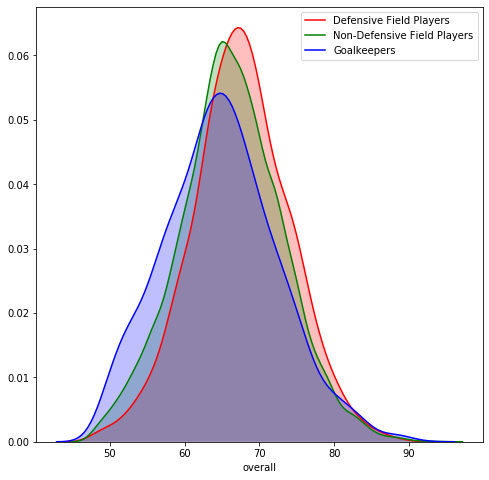

In [112]:
# Defining x1 as the overall stat of the defensive field players
x1 = df_def.overall

# Defining x2 as the overall stat of the non-defensive field players
x2 = df_ndef.overall

# Defining x3 as the overall stat of the goalkeepers
x3 = df_gk.overall

# Defining the plot size
fig, ax = plt.subplots(figsize=(8,8))

# Creating distribution plots of the overalls of each dataset in order to observe how overall stat is distributed
# For instance, sns.displot(dataset, hist = False(not show histogram), rug = False(not show rug plot), color, 
# kde_kws (Kernel Density Estimate keyword arguments: True for shading in the colors and put in legends))
sns.distplot(x1, hist = False, rug = False, color = "r", kde_kws={"shade": True, "label": "Defensive Field Players"})
sns.distplot(x2, hist = False, rug = False, color = "g", kde_kws={"shade": True, "label": "Non-Defensive Field Players"})
sns.distplot(x3, hist = False, rug = False, color = "b", kde_kws={"shade": True, "label": "Goalkeepers"})

In [113]:
# Further observing the statistics of the dataset of defensive field players (mean, standard deviation, quartiles etc)
df_def.describe()

,overall,pace,shooting,passing,dribbling,physic,defending
count,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000,2728.000000
mean,67.548387,62.644062,52.515762,62.054252,63.710411,69.168988,63.456012
std,6.520837,9.184204,11.087665,8.505439,8.028626,7.964514,7.701640
min,48.000000,30.000000,22.000000,27.000000,30.000000,39.000000,21.000000
25%,63.000000,58.000000,45.000000,57.000000,59.000000,64.000000,59.000000
50%,67.000000,64.000000,53.000000,62.000000,64.000000,70.000000,64.000000
75%,72.000000,69.000000,61.000000,68.000000,69.000000,75.000000,68.000000
max,89.000000,90.000000,81.000000,87.000000,90.000000,89.000000,87.000000


In [114]:
# Further observing the statistics of the dataset of non-defensive field players (mean, standard deviation, quartiles etc)
df_ndef.describe()

,overall,pace,shooting,passing,dribbling,physic
count,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000,13514.000000
mean,66.200089,68.721696,52.254403,56.260693,62.293621,64.010212
std,6.883448,11.409541,14.551245,10.485910,10.667228,9.860046
min,48.000000,24.000000,15.000000,24.000000,23.000000,27.000000
25%,62.000000,63.000000,41.000000,49.000000,56.000000,58.000000
50%,66.000000,70.000000,55.000000,57.000000,64.000000,65.000000
75%,71.000000,76.000000,63.000000,63.000000,69.000000,71.000000
max,94.000000,96.000000,93.000000,92.000000,96.000000,90.000000


In [115]:
# Further observing the statistics of the dataset of goalkeepers (mean, standard deviation, quartiles etc)
df_gk.describe()

,overall,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning
count,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000
mean,64.796660,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754
std,7.603627,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876
min,48.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000
25%,60.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000
50%,65.000000,65.000000,63.000000,61.000000,66.000000,39.000000,64.000000
75%,70.000000,70.000000,68.000000,66.000000,72.000000,46.000000,69.000000
max,91.000000,90.000000,92.000000,93.000000,92.000000,65.000000,91.000000


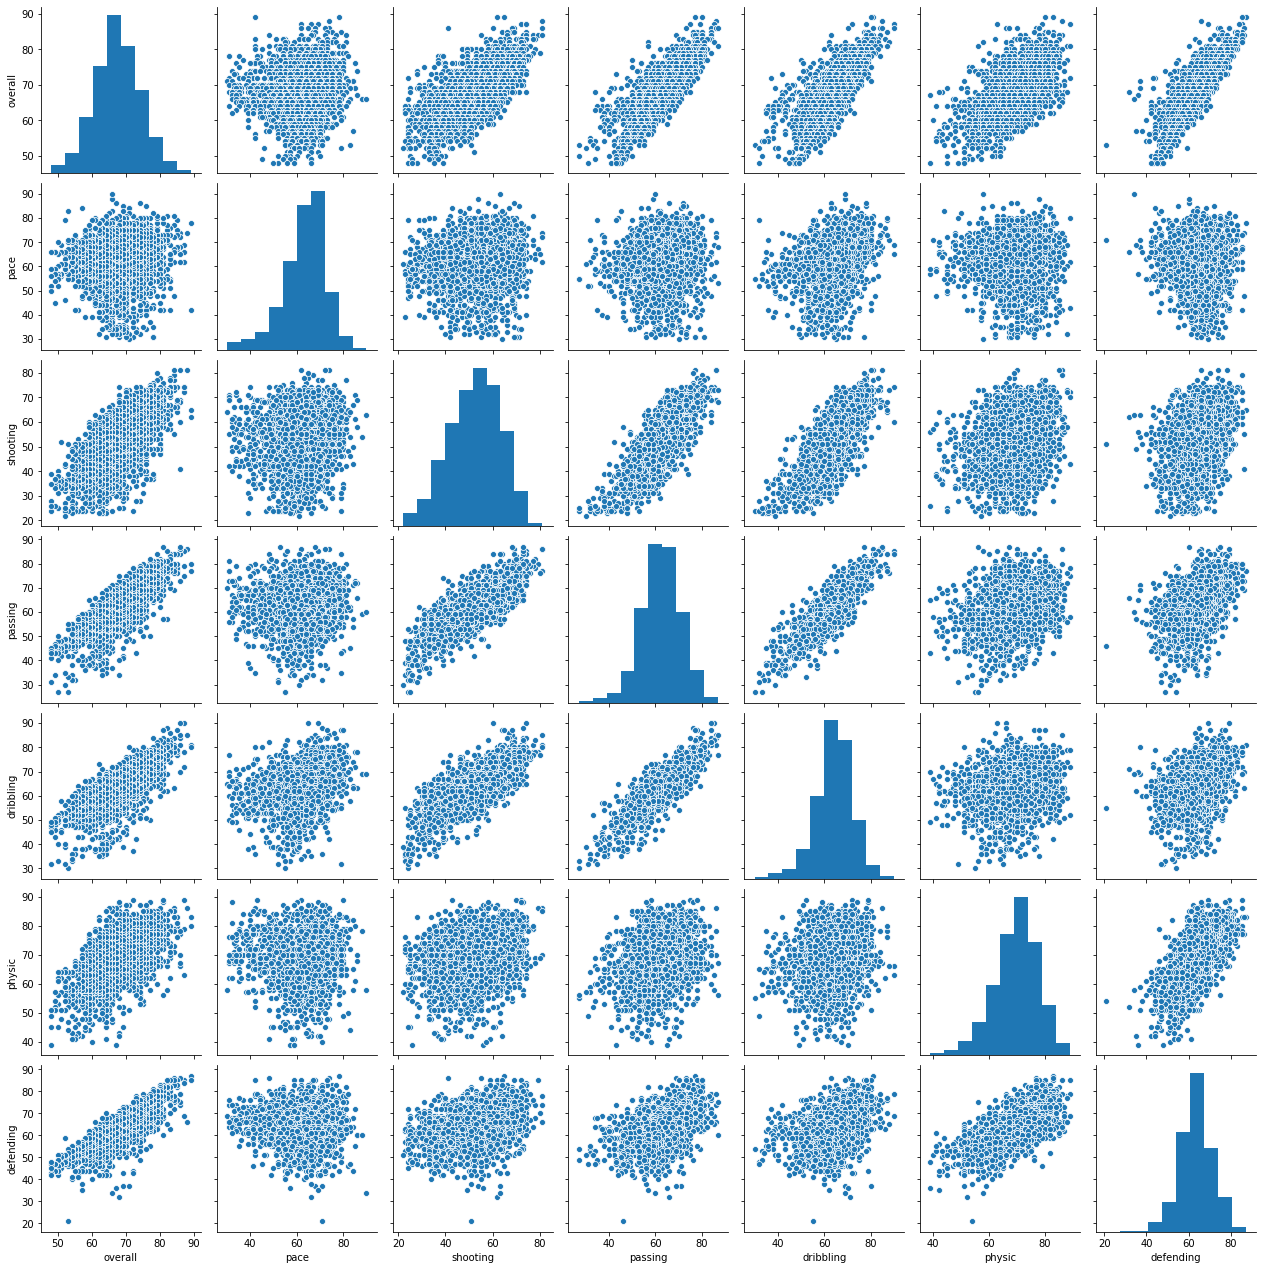

In [116]:
# Plotting pairwise relationships of variables in the dataset of defensive field players
sns.pairplot(df_def)

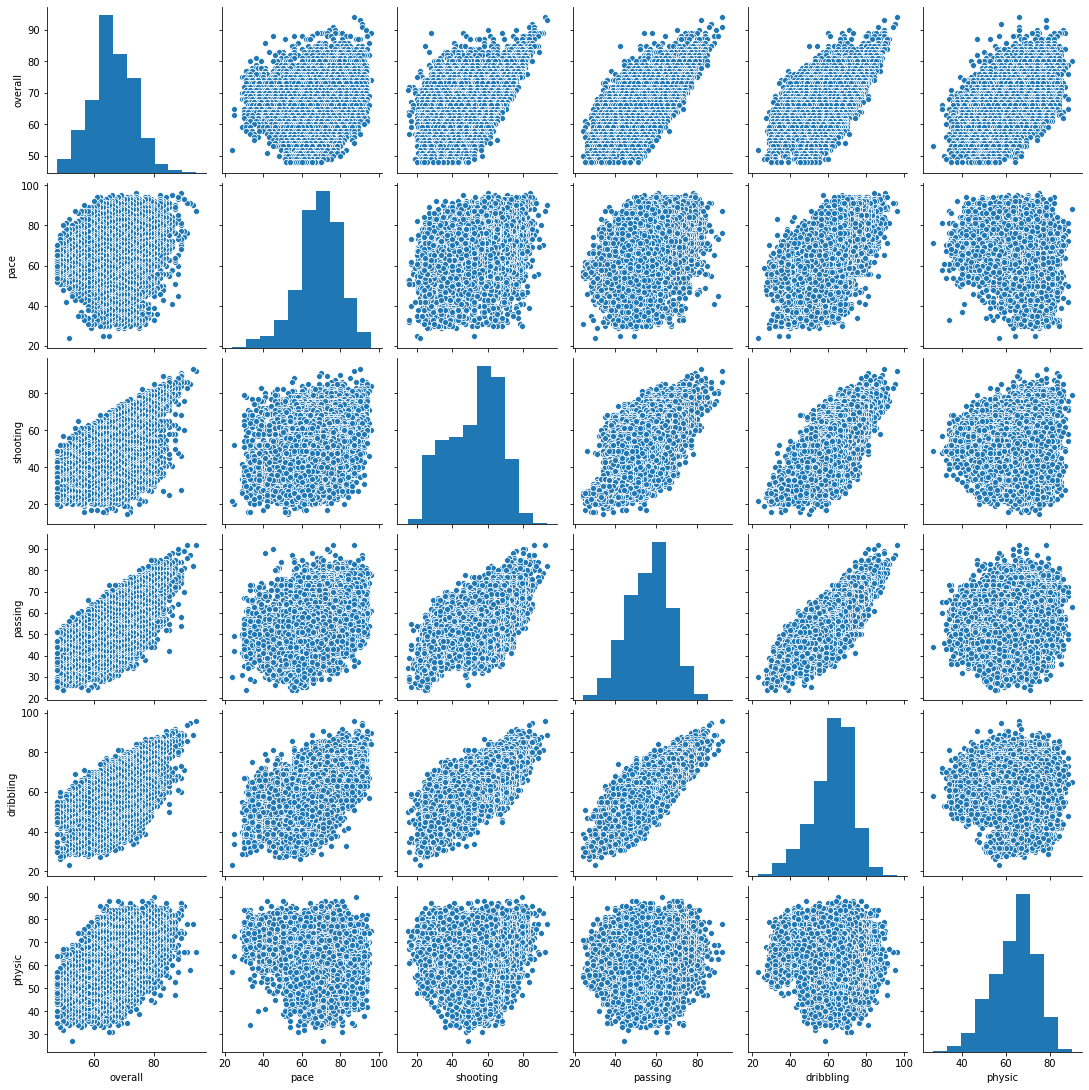

In [117]:
# Plotting pairwise relationships of variables in the dataset of non-defensive field players
sns.pairplot(df_ndef)

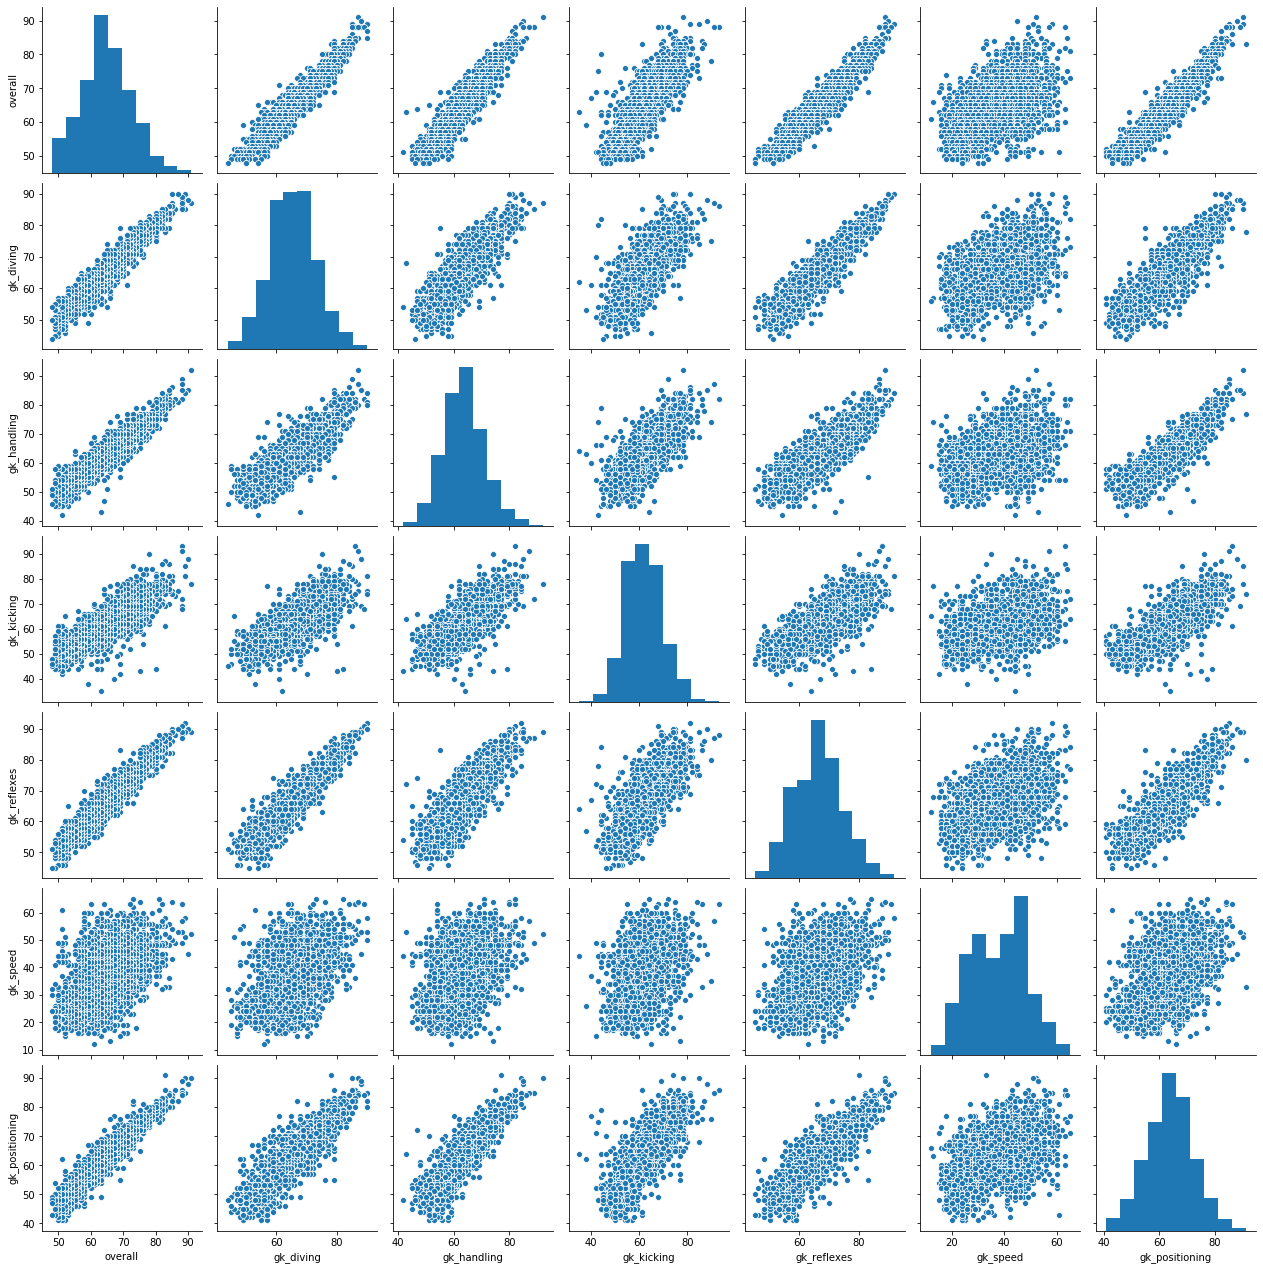

In [118]:
# Plotting pairwise relationships of variables in the dataset of goalkeepers
sns.pairplot(df_gk)

## Part 4: Model Building and Evaluation

### Part 4-1: Multiple Linear Regression of Defensive Field Players

In [119]:
# Building a multiple linear regression model to observe the relationship between independent variables and dependent
# variables in the dataset of defensive field players

# Dependent Variable
Y1 = df_def["overall"]

# Independent Variable
X1 = df_def[["pace", "shooting", "passing", "dribbling", "physic", "defending"]]

# Splitting the data into training and test sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

# Creating constants for the linear model made by statsmodels
X_train = sm.add_constant(X_train)

# Creating the model and fitting the training data
results = sm.OLS(Y_train, X_train).fit()

# Summar of the model, including R-squared value and p-values for each independent variables in the training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     3225.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:27:57   Log-Likelihood:                -4687.3
No. Observations:                2182   AIC:                             9389.
Df Residuals:                    2175   BIC:                             9428.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6262      0.561     11.810      0.000       5.526       7.727
pace           0.0031      0.005      0.578      0.563      -0.007       0.014
shooting      -0.0017      0.007     -0.241      0.810      -0.016       0.012
passing        0.2805      0.013     21.848      0.000       0.255       0.306
dribbling      0.1566      0.012     12.708      0.000       0.132       0.181
physic         0.1032      0.008     13.584      0.000       0.088       0.118
defending      0.4143      0.009     48.202      0.000       0.397       0.431
==============================================================================
Omnibus:                      527.874   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1585.832
Skew:                           1.227   Prob(JB):                         0.00
Kurtosis:                       6.380   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2: 0.897206147370207
Test MSE: 4.350938872752009


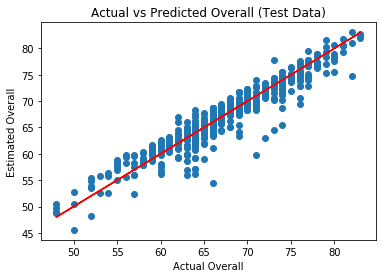

In [120]:
# Creating a plot to evaluate how well the test data fits into the trained model

# Adding constants for the statsmodel
X_test = sm.add_constant(X_test)

# Predicting Y-values with X-values from the test dataset
Y_preds = results.predict(X_test)

# Plotting the results (how well the points fit the linear model)
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color = "red")
plt.xlabel("Actual Overall")
plt.ylabel("Estimated Overall")
plt.title("Actual vs Predicted Overall (Test Data)")

# R-squared value of the test data
print("R^2:", r2_score(Y_test, Y_preds))

# Test-MSE 
print("Test MSE:",mean_squared_error(Y_test, Y_preds))

### Part 4-2: Multiple Linear Regression of Non-Defensive Field Players

In [121]:
# Building a multiple linear regression model to observe the relationship between independent variables and dependent
# variables in the dataset of non-defensive field players

# Dependent Variable
Y2 = df_ndef["overall"]

# Independent Variable
X2 = df_ndef[["pace", "shooting", "passing", "dribbling", "physic"]]

# Splitting the data into training and test sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

# Creating constants for the linear model made by statsmodels
X_train = sm.add_constant(X_train)

# Creating the model and fitting the training data
results = sm.OLS(Y_train, X_train).fit()

# Summary of the model, including R-squared value and p-values for each independent variables in the training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     4902.
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:27:57   Log-Likelihood:                -29765.
No. Observations:               10811   AIC:                         5.954e+04
Df Residuals:                   10805   BIC:                         5.959e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0332      0.373     50.960      0.000      18.301      19.765
pace          -0.0476      0.004    -11.106      0.000      -0.056      -0.039
shooting       0.0017      0.004      0.415      0.678      -0.006       0.009
passing        0.2171      0.007     31.836      0.000       0.204       0.230
dribbling      0.2544      0.009     28.068      0.000       0.237       0.272
physic         0.3479      0.004     89.957      0.000       0.340       0.355
==============================================================================
Omnibus:                      173.094   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.241
Skew:                           0.300   Prob(JB):                     1.62e-40
Kurtosis:                       3.217   Cond. No.                     1.41e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2: 0.6846941759341476
Test MSE: 15.247324495691197


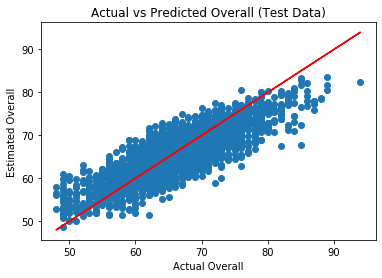

In [122]:
# Creating a plot to evaluate how well the test data fits into the trained model

# Adding constants for the statsmodel
X_test = sm.add_constant(X_test)

# Predicting Y-values with X-values from the test dataset
Y_preds = results.predict(X_test)

# Plotting the results (how well the points fit the linear model)
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color = "red")
plt.xlabel("Actual Overall")
plt.ylabel("Estimated Overall")
plt.title("Actual vs Predicted Overall (Test Data)")

# R-squared value of the test data
print("R^2:", r2_score(Y_test, Y_preds))

# Test-MSE 
print("Test MSE:",mean_squared_error(Y_test, Y_preds))

### Part 4-3: Multiple Linear Regression of Goalkeepers

In [123]:
# Building a multiple linear regression model to observe the relationship between independent variables and dependent
# variables in the dataset of goalkeepers

# Dependent Variable
Y3 = df_gk["overall"]

# Independent Variable
X3 = df_gk[["gk_diving", "gk_handling", "gk_kicking", "gk_reflexes", "gk_speed", "gk_positioning"]]

# Splitting the data into training and test sets (80:20 split)
X_train, X_test, Y_train, Y_test = train_test_split(X3, Y3, test_size = 0.2, random_state = 42)

# Creating constants for the linear model made by statsmodels
X_train = sm.add_constant(X_train)

# Creating the model and fitting the training data
results = sm.OLS(Y_train, X_train).fit()

# Summary of the model, including R-squared value and p-values for each independent variables in the training data
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 2.912e+04
Date:                Sun, 30 Aug 2020   Prob (F-statistic):               0.00
Time:                        01:27:58   Log-Likelihood:                -1794.3
No. Observations:                1628   AIC:                             3603.
Df Residuals:                    1621   BIC:                             3640.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.0309      0.172     -6.000      0.000      -1.368      -0.694
gk_diving          0.2416      0.006     38.032      0.000       0.229       0.254
gk_handling        0.2179      0.006     38.253      0.000       0.207       0.229
gk_kicking         0.0558      0.004     15.021      0.000       0.049       0.063
gk_reflexes        0.2476      0.006     41.681      0.000       0.236       0.259
gk_speed           0.0142      0.002      7.275      0.000       0.010       0.018
gk_positioning     0.2499      0.005     48.390      0.000       0.240       0.260
==============================================================================
Omnibus:                       40.718   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.681
Skew:                          -0.287   Prob(JB):                     2.20e-12
Kurtosis:                       3.679   Cond. No.                     1.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

R^2: 0.9901844059837976
Test MSE: 0.5686589012090962


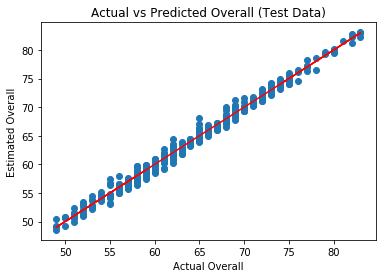

In [124]:
# Creating a plot to evaluate how well the test data fits into the trained model

# Adding constants for the statsmodel
X_test = sm.add_constant(X_test)

# Predicting Y-values with X-values from the test dataset
Y_preds = results.predict(X_test)

# Plotting the results (how well the points fit the linear model)
plt.scatter(Y_test, Y_preds)
plt.plot(Y_test, Y_test, color = "red")
plt.xlabel("Actual Overall")
plt.ylabel("Estimated Overall")
plt.title("Actual vs Predicted Overall (Test Data)")

# R-squared value of the test data
print("R^2:", r2_score(Y_test, Y_preds))

# Test-MSE 
print("Test MSE:",mean_squared_error(Y_test, Y_preds))

### Part 4-3-1: BONUS! Residual Plot of Goalkeepers

Text(0.5, 1.0, 'Residual Plot')

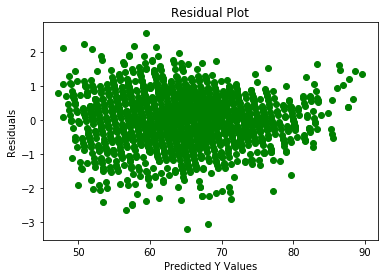

In [125]:
# BONUS!
# Building a residual plot to check for linearity in the dataset for goalkeepers. 
# The y-values are residuals (= actual y values - predicted y values) and the x-values are actual y values.
# The more the scattered data points show a significant pattern on the residual plot (such as linearity), it signifies that 
# the dataset itself does not follow a linear pattern so that a multiple linear regression is not effective.
# Here, the residual plot doesn't seem to portray a pattern, so a linear regression seems to be appropriate.

X3 = sm.add_constant(X3)

Y_preds = results.predict(X3)

residual = Y3 - Y_preds

plt.scatter(Y_preds, residual, color = "g")
plt.xlabel("Predicted Y Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")

## Part 5: Final Thoughts and What I've Learned through this Project

#### This project has given me the opportunity to learn in-depth about how multiple linear regression works, particularly in python, by using one of my favorite datasets. The following is what I've learned through this project, only to list a few:

#### -Importance of Cleaning the Dataset
#### -Importance of Knowing and Exploring the Dataset
#### -Implementation of Multiple Linear Regression in Python
#### -Fundamental Ideas of Multiple Linear Regression 
#### -Evaluating and Comparing Different Linear Regression Models 
#### -Some Data Visualization Methods in Python (Density Plots and Pairplots)
#### -Further Possibilities & Next Steps to Take in Learning about Regression


## Part 6: Resources that Helped Me with this Project

#### https://datatofish.com/multiple-linear-regression-python/
#### https://searchengineland.com/heres-how-i-used-python-to-build-a-regression-model-using-an-e-commerce-dataset-326493
#### http://faculty.marshall.usc.edu/gareth-james/ISL/
#### https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset     [Highly Recommend this Dataset]
#### https://python-graph-gallery.com/74-density-plot-of-several-variables/